## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"

In [62]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

real value 0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 2

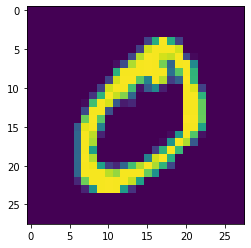

In [63]:
import sys
import numpy as np
# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
print("real value",y_train[1])
print (x_train[1])

In [64]:
x_train, x_test = x_train / 255.0, x_test / 255.0
callbacks = myCallback()   
# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model fitting
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
# model fitting

Epoch 1/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2029 - acc: 0.9398
Epoch 2/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0806 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0514 - acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0351 - acc: 0.9891
Epoch 5/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9911
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0274 - acc: 0.9911


In [75]:
model.evaluate(x_test,y_test)
# ?model.evaluate

10000/10000 [==============================] - 1s 84us/sample - loss: 0.0683 - acc: 0.9803


[0.0683365175410232, 0.9803]

In [81]:
classifications = model.predict(x_test)
print (classifications[2])
print (y_test[2])

[5.3602992e-08 9.9967027e-01 7.8341291e-06 4.4539613e-07 4.3591339e-05 2.4670844e-06 1.0476507e-05 8.2299659e-05 1.8272844e-04 7.0484503e-09]
1


In [4]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);